$\text{Nome: Rafael Gonçalves  -  RA: 186062}$

# Parte I - Atividades teóricas

## Exercício 1

a) $P(A^C) = 1 - P(A) = 1 - \frac{1}{3} = \frac{2}{3}$

b) $P(A^C \cup B) = P(A^C) + P(B) - P(A^CB) = P(A^C) + P(B) - (P(B) - P(AB)) = P(A^C) + P(AB) = \frac{2}{3} + \frac{1}{6} = \frac{5}{6}$

c) $P(A \cup B^C) = P(A) + P(B^C) - P(AB^C) = P(B^C) + P(AB) = (1 - P(B)) + P(AB) = (1 - \frac{1}{4}) + \frac{1}{6} = \frac{5}{12}$

d) $P(AB^C) = P(A) + P(B^C) - P(A \cup B^C) = \frac{1}{3} + \frac{3}{4} - \frac{5}{12} = \frac{8}{12}$

e) $P(A^C \cup B^C) = P(A^C) + P(B^C) - P(A^CB^C) = \frac{2}{3} + \frac{3}{4} - \frac{5}{6} = \frac{7}{12}$

## Exercício 2

a) $$
    F_X(x) = P(X \leq x) = \int\limits_{-\infty}^x f_X(\xi) d\xi = \int\limits_{-\infty}^x \frac{1}{2} d\xi = \left[ \frac{1}{2}\xi \right]^x_0 = \frac{1}{2} x, \forall X \in [0, 2]
$$

b)

$E\{X\} = \int\limits_{-\infty}^{\infty} xf_X(x)dx = \int\limits_0^2 \frac{1}{2}x dx = \left[\frac{x^2}{4}\right]^2_0 = 1$

$E\{X^2\} = \int\limits_{-\infty}^{\infty} x^2f_X(x)dx = \int\limits_0^2 \frac{1}{2}x^2 dx = \left[\frac{x^3}{6}\right]^2_0 = \frac{4}{3}$

$E\{X^3\} = \int\limits_{-\infty}^{\infty} x^3f_X(x)dx = \int\limits_0^2 \frac{1}{2}x^3 dx = \left[\frac{x^4}{8}\right]^2_0 = 2$

## Exercício 3

a) $X_2$, pois quanto mais próximo da distribuição uniforme, mais difícil é acertar o resultado de um evento aleatório "chutando um valor", ou seja, a variável aleatória $X_2$ carrega mais informação que a variável aleatória $X_1$, pois neste último eu poderia supor que o resultado será sempre 3 com uma taxa de acertos de 40% contra uma taxa de acertos de 25% para qualquer valor estimado para $X_2$ se não tivermos nenhuma informação _a priori_.

b)

$H(X_1) = - \sum\limits_x p(X_1)log_2[p(X_1)] = -[0,1(-3,32) + 0,2(-2,32) + 0,3(-1,74) + 0,4(-1,32)] = 1,85$

$H(X_2) = - \sum\limits_x p(X_2)log_2[p(X_2)] = - [0,25 (-2) + 0,25 (-2) + 0,25 (-2) + 0,25(-2)] = 2$

c)

$D(P_1 || P_2) = \sum\limits_x p(X_1)log_2\left[\frac{p(X_1)}{p(X_2)}\right] = 0,1(-1,32) + 0,2(-0,32) + 0,3(-0,26) + 0,4(-0,68) = -0,54$

$D(P_2 || P_1) = \sum\limits_x p(X_2)log_2\left[\frac{p(X_2)}{p(X_1)}\right] = 0,25(1.32 +  0.32 - 0.26 -0.68) = 0,18$

## Exercício 4

a) $\mu_{ML} = arg max_\theta p(x|\mu) = arg max_\theta log[p(x|\mu)] = arg max_\theta \frac{p(x\mu)}{p(\mu)} = x$

b) $\mu_{ML} = arg max_\theta p(\mathbf{x}|\mu) = arg ax_\theta log[p(\mathbf{x}|\mu)] = arg max_\theta \sum\limits_{k=1}^{N} log[p(x_K|\mu)] =  arg max_\theta \sum\limits_{k=1}^{N} log\left[\frac{p(x_K\mu)}{p(\mu)}\right] $

c) 

# Parte II - Atividade computacional

### Importa bibliotecas

In [137]:
import os
import urllib.request
import random
random.seed = 42
import numpy as np
np.random.seed = 42
import matplotlib.pyplot as plt
%matplotlib inline

### Download dataset

In [94]:
data_url = 'http://www.dca.fee.unicamp.br/~lboccato/sunspot.txt'
data_dir = os.path.abspath(os.path.relpath('../data'))
data_path = os.path.join(data_dir, 'sunspot.txt')

urllib.request.urlretrieve(data_url, data_path)

('/home/rafael/inbox/machine-learning/data/sunspot.txt',
 <http.client.HTTPMessage at 0x7fa4594505c0>)

In [95]:
%%bash
head ../data/sunspot.txt

 1749   58.0  62.6  70.0  55.7  85.0  83.5  94.8  66.3  75.9  75.5 158.6  85.2
 1750   73.3  75.9  89.2  88.3  90.0 100.0  85.4 103.0  91.2  65.7  63.3  75.4
 1751   70.0  43.5  45.3  56.4  60.7  50.7  66.3  59.8  23.5  23.2  28.5  44.0
 1752   35.0  50.0  71.0  59.3  59.7  39.6  78.4  29.3  27.1  46.6  37.6  40.0
 1753   44.0  32.0  45.7  38.0  36.0  31.7  22.0  39.0  28.0  25.0  20.0   6.7
 1754    0.0   3.0   1.7  13.7  20.7  26.7  18.8  12.3   8.2  24.1  13.2   4.2
 1755   10.2  11.2   6.8   6.5   0.0   0.0   8.6   3.2  17.8  23.7   6.8  20.0
 1756   12.5   7.1   5.4   9.4  12.5  12.9   3.6   6.4  11.8  14.3  17.0   9.4
 1757   14.1  21.2  26.2  30.0  38.1  12.8  25.0  51.3  39.7  32.5  64.7  33.5
 1758   37.6  52.0  49.0  72.3  46.4  45.0  44.0  38.7  62.5  37.7  43.0  43.0


### Importa dataset

In [96]:
dataset = np.loadtxt(data_path, usecols=range(1,13))

In [97]:
dataset.shape

(266, 12)

### Cria conjunto de teste e conjunto de treino

In [98]:
K = 20 # temporal window size
N = dataset.shape[0] # number of samples
M = N-K+1 # number of samples of new dataset
X = np.empty((M,K))
y = np.empty((M,1))

for i in range(M):
    for k in range(K):
        X[i][k] = dataset.flatten()[(i+K) - (k + 1)]
    y[i][0] = (dataset.flatten()[i+K])


In [99]:
X_train = np.array(X[:-5])
X_test = np.array(X[-5:])
y_train = np.array(y[:-5])
y_test = np.array(y[-5:])

In [100]:
X_train_bias = np.column_stack((np.ones(X_train.shape[0]), X_train))
X_test_bias = np.column_stack((np.ones(X_test.shape[0]), X_test))

In [101]:
X_train_bias.shape, X_test_bias.shape

((242, 21), (5, 21))

### Define RMSE como critério de erro

In [102]:
def rmse(output, target):
    """Root Mean Squared Error"""
    error = np.subtract(output, target)
    error = np.square(error)
    error = np.sum(error)/np.size(error)
    return np.sqrt(error)

### Regressão linear na forma matricial

In [103]:
linreg = lambda W, X: np.dot(X, W)

## a) Solução ótima com MMQ

In [104]:
mmq = lambda X, y: np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

In [105]:
W_train = mmq(X_train_bias, y_train)
W_test = mmq(X_test_bias, y_test)

In [106]:
out_train = linreg(W_train, X_train_bias)
out_test = linreg(W_train, X_test_bias)

In [107]:
print("RMSE do conjunto de treino: {}\nRMSE do conjunto de teste: {}".format(rmse(out_train, y_train), rmse(out_test, y_test)))

RMSE do conjunto de treino: 13.972766440052313
RMSE do conjunto de teste: 28.492530791192834


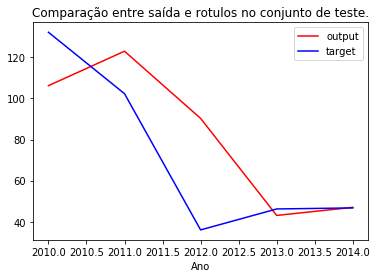

In [108]:
x_axis = [2010, 2011, 2012, 2013, 2014]
plt.plot(x_axis, out_test, '-r')
plt.plot(x_axis, y_test, '-b')
plt.xlabel('Ano')
plt.legend(('output', 'target'))
plt.title('Comparação entre saída e rotulos no conjunto de teste.')
plt.show()

## b) Seleção de variáveis, validação cruzada e regularização

In [124]:
def kfold(X, y, K, lamb_vec):
    N = X.shape[0]
    min_rmse = 999
    min_lamb = None
    for l in lamb_vec:
        error = 0
        for i in range(K):
            slic = range(int(i*N/K),int((i+1)*N/K))
            Xprime = X[slic,:]
            target = y[slic]
            w = np.dot(np.dot(np.linalg.inv(np.dot(Xprime.T, Xprime) + l*np.eye(Xprime.shape[1])), Xprime.T), target)
            out = linreg(w, Xprime)
            error += rmse(out, target)            
        error /= K    
        if error <= min_rmse:
            min_rmse = error
            min_lamb = l
    return (min_rmse, min_lamb)
    

In [125]:
def wrapper(X, y, N, K, lamb_vec):
    """Backward selection of the N inputs using K fold cross validation for choosing ridge regression hyperparameters."""
    for i in range(N):
        Xprime = X[:,:X.shape[1]-i]
        (error, lamb) = kfold(Xprime, y, K, lamb_vec)
        print("N = {}".format(i))
        print("min RMSE = {}\nlambda = {}\n".format(error, lamb))        

In [152]:
lamb_vec = [np.random.random()*0.001 + 1E-7 for _ in range(100)]
wrapper(X_train_bias, y_train, 20, 10, lamb_vec)

N = 0
min RMSE = 4.9748325731518825
lambda = 1.9985404006786056e-06

N = 1
min RMSE = 5.789795293490264
lambda = 1.9985404006786056e-06

N = 2
min RMSE = 6.206328465387806
lambda = 1.9985404006786056e-06

N = 3
min RMSE = 6.9431899063164435
lambda = 1.9985404006786056e-06

N = 4
min RMSE = 7.410169492257451
lambda = 1.9985404006786056e-06

N = 5
min RMSE = 7.855196313369805
lambda = 1.9985404006786056e-06

N = 6
min RMSE = 8.008427035371232
lambda = 1.9985404006786056e-06

N = 7
min RMSE = 8.33713881076942
lambda = 1.9985404006786056e-06

N = 8
min RMSE = 8.899932067245782
lambda = 1.9985404006786056e-06

N = 9
min RMSE = 9.096362690323726
lambda = 1.9985404006786056e-06

N = 10
min RMSE = 9.483113014054792
lambda = 1.9985404006786056e-06

N = 11
min RMSE = 9.95386809767428
lambda = 1.9985404006786056e-06

N = 12
min RMSE = 10.392557867291647
lambda = 1.9985404006786056e-06

N = 13
min RMSE = 10.653231841915765
lambda = 1.9985404006786056e-06

N = 14
min RMSE = 11.099920252678261
lambd

In [156]:
l = 3.58E-6
Xprime = X_test_bias
target = y_test
w = np.dot(np.dot(np.linalg.inv(np.dot(Xprime.T, Xprime) + l*np.eye(Xprime.shape[1])), Xprime.T), target)

In [157]:
out_test = linreg(w, X_test_bias)

In [158]:
print(rmse(out_test, target))

0.00048499481914528213


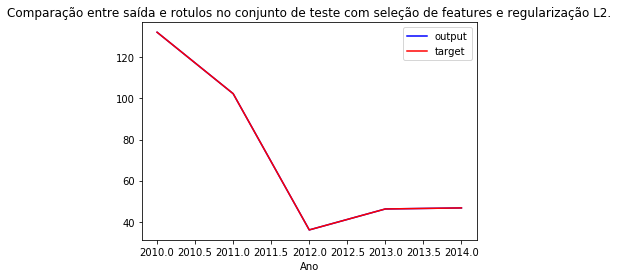

In [163]:
x_axis = [2010, 2011, 2012, 2013, 2014]
plt.plot(x_axis, y_test, '-b')
plt.plot(x_axis, out_test, '-r')
plt.xlabel('Ano')
plt.legend(('output', 'target'))
plt.title('Comparação entre saída e rotulos no conjunto de teste com seleção de features e regularização L2.')
plt.show()